In [8]:
import math
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random

In [9]:
for i in range(10):
    print(random.rand())

0.9052450954029012
0.268438983965372
0.39642569360134305
0.2855415942925523
0.674638891062864
0.397175943907469
0.8916886173321832
0.6433401281831508
0.15638356293780564
0.05006019580631338


In [10]:
print(f"Un vecteur de nombres aléatoires de taille 4 : {random.rand(4)}.")

print(f"Une matrice de nombres aléatoires de taille 2 par 3 : {random.rand(2,3)}.")

Un vecteur de nombres aléatoires de taille 4 : [0.60762988 0.33052185 0.13831248 0.14838135].
Une matrice de nombres aléatoires de taille 2 par 3 : [[0.56791513 0.26399637 0.2785913 ]
 [0.17929815 0.45572534 0.76020978]].


In [11]:
print(random.rand())
print("---")
random.seed(seed=1) #ici on fixe la valeur de la graine
print(random.rand())
print(random.rand())
print(random.rand())
print(random.rand())
print("---")
random.seed(seed=1)
print(random.rand())
print(random.rand())
print(random.rand())
print(random.rand())

0.7472226676638385
---
0.417022004702574
0.7203244934421581
0.00011437481734488664
0.30233257263183977
---
0.417022004702574
0.7203244934421581
0.00011437481734488664
0.30233257263183977


In [12]:
def uniforme_continue(a,b):
    return (b-a)*(random.rand()) + a

In [13]:
a=0
b=1

for i in range(10):
    print(uniforme_continue(a,b))

0.14675589081711304
0.0923385947687978
0.1862602113776709
0.34556072704304774
0.39676747423066994
0.538816734003357
0.4191945144032948
0.6852195003967595
0.20445224973151743
0.8781174363909454


In [14]:
def test_disque(N):
    Z = np.zeros((2,N))
    for i in range(N):
        Z[0, i] = uniforme_continue(-1, 1)
        Z[1, i] = uniforme_continue(-1, 1)
    return Z

In [15]:
test_disque(3)

array([[-0.94522481, -0.1653904 , -0.71922612],
       [ 0.34093502,  0.11737966, -0.60379702]])

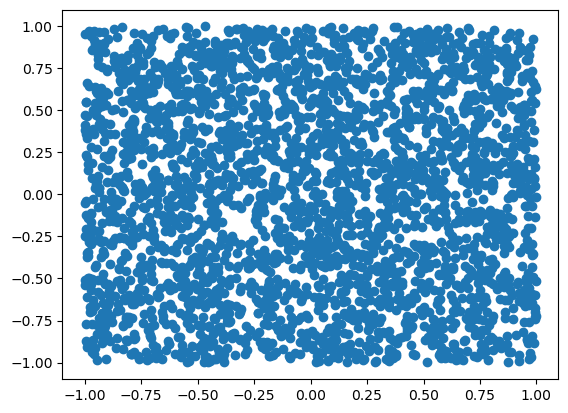

In [16]:
a = test_disque(3000)
plt.scatter(a[0],a[1])
plt.show()

In [17]:
def kPremier(N):
    a = test_disque(N)
    x = []
    y = []
    xp = []
    yp = []
    for i in range(N):
        if ((a[0][i]**2 + a[1][i]**2)**(1/2) <= 1) :
            x.append(a[0][i])
            y.append(a[1][i])
        else:
            xp.append(a[0][i])
            yp.append(a[1][i])
    
    return np.array((x,y)), np.array((xp,yp))

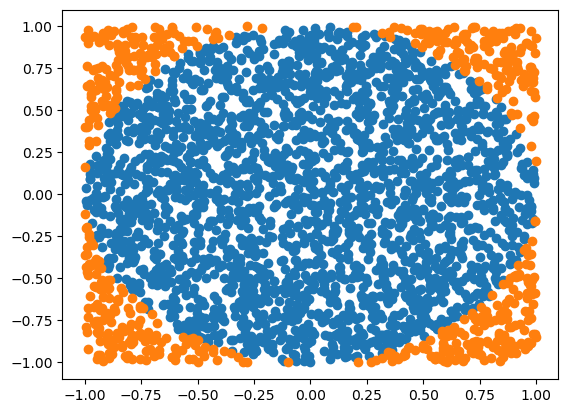

In [18]:

N = 3000
a = kPremier(N)
x = a[0]
y = a[1]


plt.scatter(x[0],x[1])
plt.scatter(y[0],y[1])
plt.show()

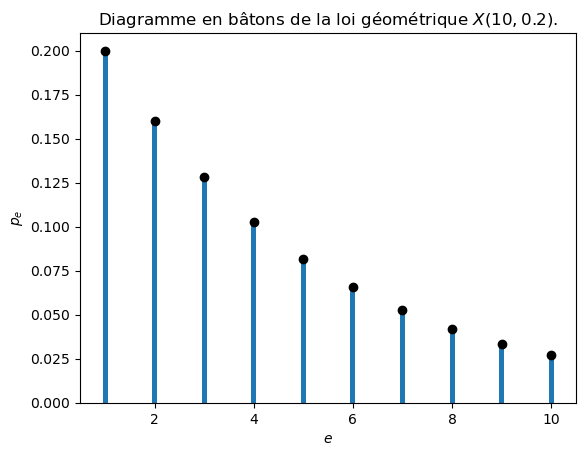

In [19]:
n = 10
p = 0.2
x = np.array(range(1, n+1))
y = [(1-p)**(k-1) * p for k in x]

width = 0.1
fig = plt.figure()

plt.bar(x, y, width, align="center")
plt.scatter(x, y, color="black")
plt.xlabel("$e$")
plt.ylabel("$p_e$")
plt.title(f"Diagramme en bâtons de la loi géométrique $X({n},{p})$.")
plt.show()

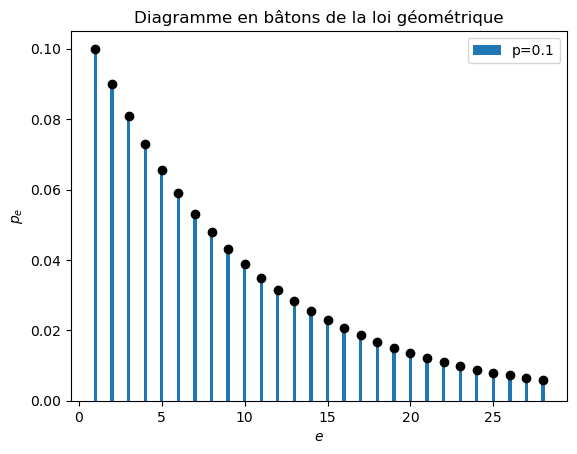

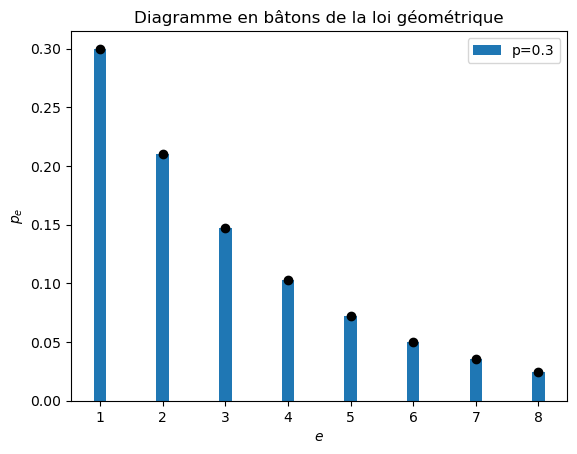

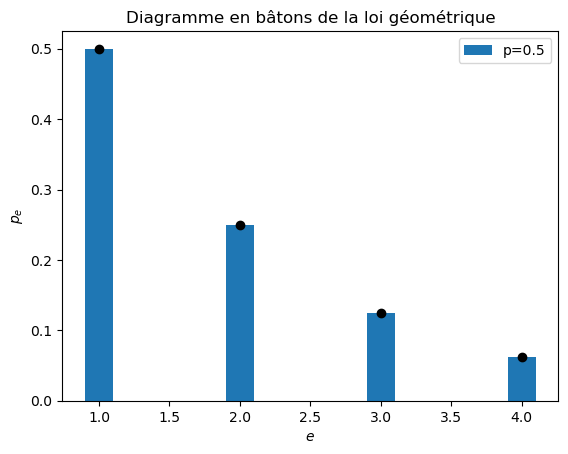

In [20]:
p = [0.1, 0.3, 0.5]
width = 0.2
fig = plt.figure()
for i in p:
    m = math.floor(math.log(0.05)/math.log(1-i))
    x = np.array(range(1, m+1))
    y = [(1-i)**(k-1) * i for k in x]
    plt.bar(x, y, width, align="center", label=f"p={i}")
    plt.scatter(x, y, color="black")
    plt.xlabel("$e$")
    plt.ylabel("$p_e$")
    plt.title(f"Diagramme en bâtons de la loi géométrique")
    plt.legend()
    plt.show()

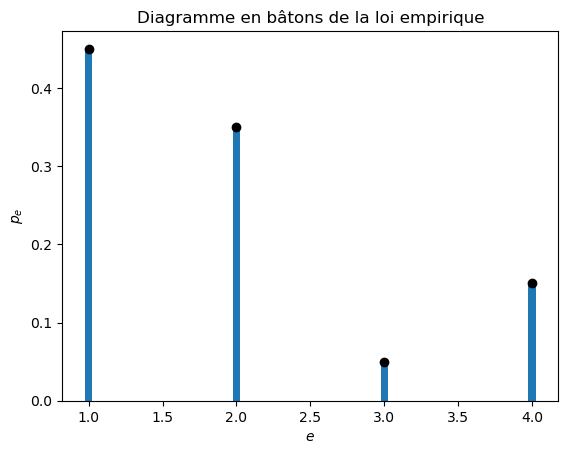

In [21]:
x = [1, 2, 3, 4]
N = [450, 350, 50, 150]
n = sum(N)
frequence = [x/n for x in N]
width = 0.05
fig = plt.figure()
plt.xlabel("$e$")
plt.ylabel("$p_e$")
plt.title("Diagramme en bâtons de la loi empirique")
plt.bar(x, frequence, width, align="center")
plt.scatter(x, frequence, color="black")
plt.show()

In [22]:
def de():
    return math.ceil(6*random.rand())

def max3de():
    return max([de(), de(), de()])

<Figure size 640x480 with 0 Axes>

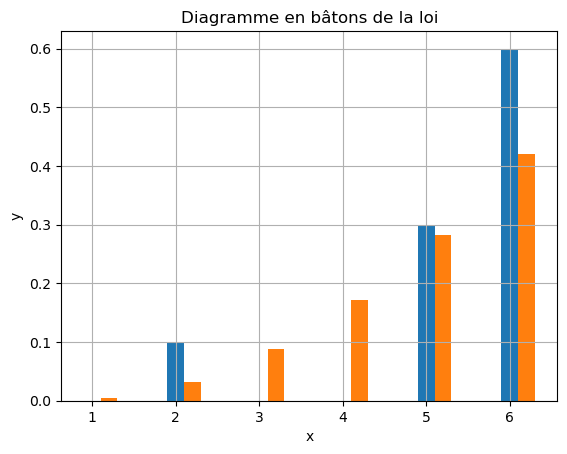

<Figure size 640x480 with 0 Axes>

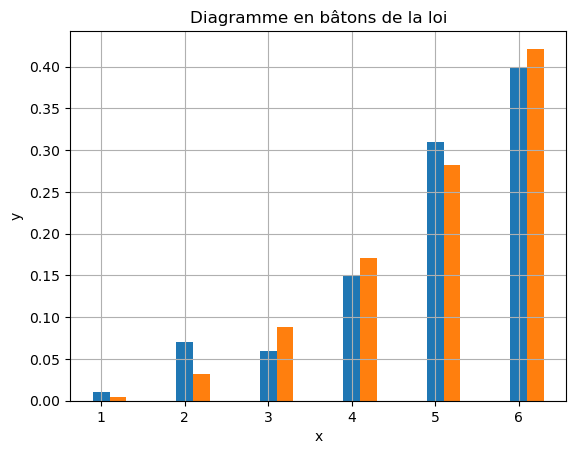

<Figure size 640x480 with 0 Axes>

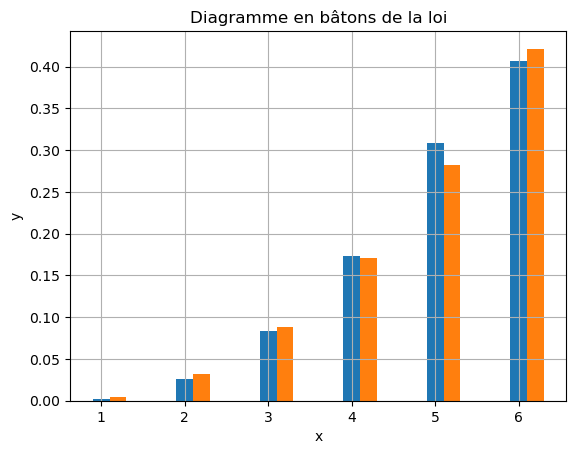

In [33]:
def test_max_3_de(N):
    Z = np.zeros(N)
    for i in range(N):
        Z[i] = max3de()
    card = plt.hist(Z, [1, 2, 3, 4, 5, 6, 7])
    width = 0.1
    
    plt.clf()
    plt.figure()
    plt.grid()
    plt.title("Diagramme en bâtons de la loi")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.bar(range(1,7),card[0]/N,width = 0.2)
    plt.bar(np.arange(1,7)+0.2,[(i**3-(i-1)**3)/6**3 for i in range(1,7)],width = 0.2)
    plt.show()

    
test_max_3_de(10)
test_max_3_de(100)
test_max_3_de(1000)

In [34]:
def showGraph(f, p, m):
    n = 10000
    card = np.zeros(m)
    for i in range(n):
        geom = f(p)
        if geom <= m:
            card[geom-1] += 1
            
    x = np.array(range(1, m+1))
    y = [(1-p)**(k-1) * p for k in x]
    width = 0.1
    
    fig = plt.figure()
    plt.bar(x, y, width, align="center", label="loi théorique")
    plt.bar(x+0.2, card/n, width, align="center", label="mesure empirique")
    plt.xlabel("$e$")
    plt.ylabel("$p_e$")
    plt.title(f"Diagramme de la loi géométrique $G({p})$.")
    plt.legend()
    plt.show()

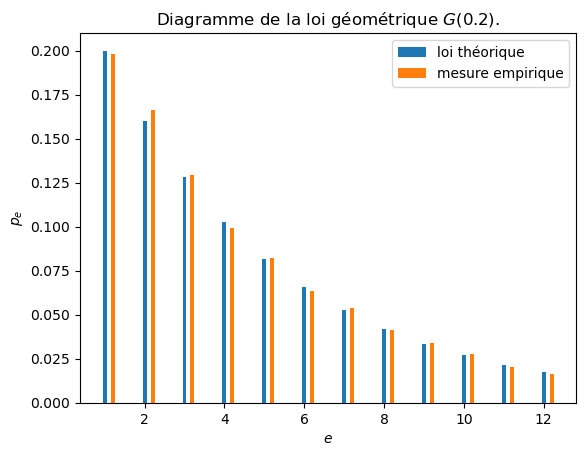

In [35]:
def geometrique1(p):
    U = uniforme_continue(0, 1)
    b = 0
    k = 0
    while b < U:
        k += 1
        b += p * (1-p)**(k-1)
    return k

m = 12
p = 0.2
showGraph(geometrique1, p, m)

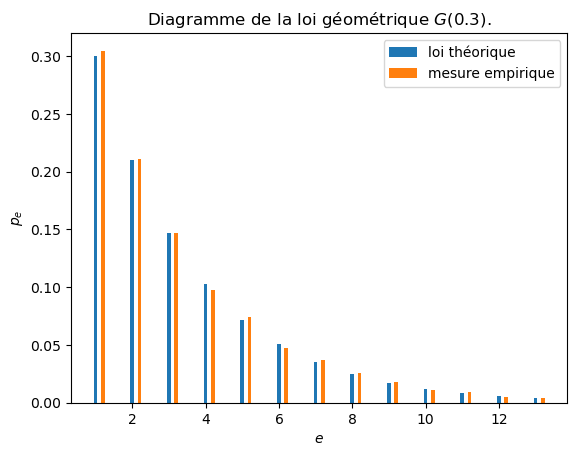

In [36]:
def geometrique2(p):
    k = 1
    while uniforme_continue(0, 1) > p:
        k += 1
    return k
        
p = 0.3
m = 13
showGraph(geometrique2, p, m)

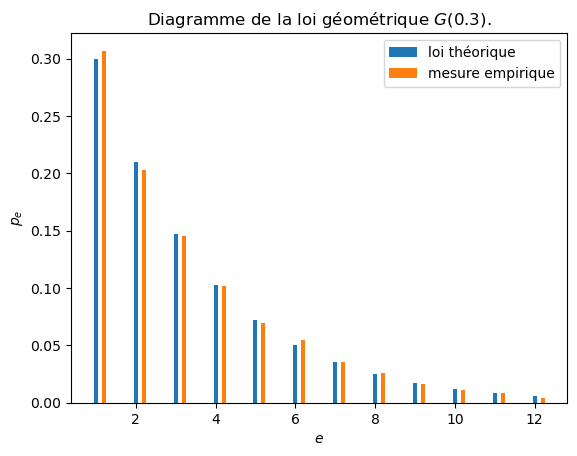

In [37]:
def geometrique3(p):
    return math.ceil(math.log(uniforme_continue(0, 1)) / math.log(1-p))
        
p = 0.3
m = 12
showGraph(geometrique3, p, m)

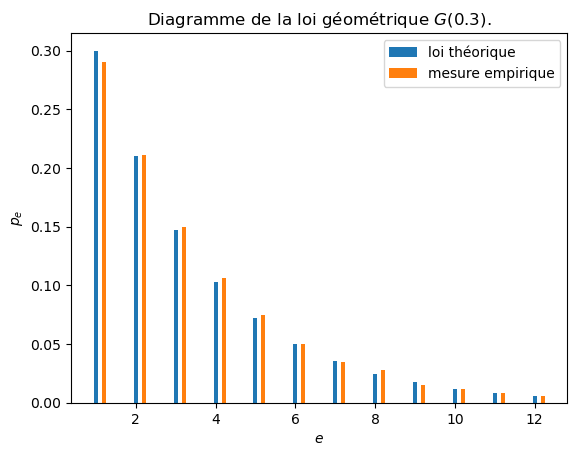

In [38]:
def geometrique4(p):
    return scs.geom.rvs(p) #np.random.geometric(p)

p = 0.3
m = 12
showGraph(geometrique4, p, m)

In [39]:
from time import time

for index, f in enumerate([geometrique1, geometrique2, geometrique3, geometrique4]):
    N = 100000
    p = 0.5
    t1 = time()
    [f(p) for i in range(N)]
    t2 = time()
    temps1 = t2 - t1
    print(f"La méthode {index + 1} a pris {temps1} secondes.")

La méthode 1 a pris 0.10540652275085449 secondes.
La méthode 2 a pris 0.11203813552856445 secondes.
La méthode 3 a pris 0.09955310821533203 secondes.
La méthode 4 a pris 3.5846686363220215 secondes.
